# Introduction to Matplotlib

---

## Using the matplotlib.pyplot Interface

**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Creating a blank plot

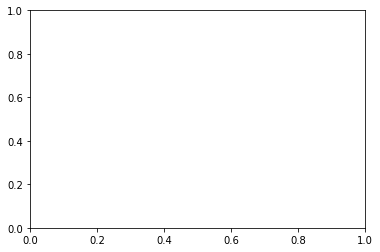

In [3]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()
plt.show()

---

## Adding Data to an axes object

In [4]:
# Loading Datasets
seattle_weather = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/seattle_weather.csv")
austin_weather = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/austin_weather.csv")

**Datasets**

In [5]:
sw = seattle_weather.loc[:,["STATION", "NAME", "DATE", "MLY-PRCP-NORMAL"]]

In [6]:
aw = austin_weather.loc[:, ["STATION", "NAME", "DATE", "MLY-PRCP-NORMAL"]]

In [10]:
month = []
x = range(1,13)
m = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for x in sw["DATE"]:
    if x == 1:
        month.append(m[0])
    elif x == 2:
        month.append(m[1])
    elif x == 3:
        month.append(m[2])
    elif x == 4:
        month.append(m[3])
    elif x == 5:
        month.append(m[4])
    elif x == 6:
        month.append(m[5])
    elif x == 7:
        month.append(m[6])
    elif x == 8:
        month.append(m[7])
    elif x == 9:
        month.append(m[8])
    elif x == 10:
        month.append(m[9])
    elif x == 11:
        month.append(m[10])
    elif x == 12:
        month.append(m[11])

In [12]:
month = []
x = range(1,13)
m = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for x in aw["DATE"]:
    if x == 1:
        month.append(m[0])
    elif x == 2:
        month.append(m[1])
    elif x == 3:
        month.append(m[2])
    elif x == 4:
        month.append(m[3])
    elif x == 5:
        month.append(m[4])
    elif x == 6:
        month.append(m[5])
    elif x == 7:
        month.append(m[6])
    elif x == 8:
        month.append(m[7])
    elif x == 9:
        month.append(m[8])
    elif x == 10:
        month.append(m[9])
    elif x == 11:
        month.append(m[10])
    elif x == 12:
        month.append(m[11])

In [11]:
sw["MONTH"] = month

In [13]:
aw["MONTH"] = month

In [14]:
sw.head()

,STATION,NAME,DATE,MLY-PRCP-NORMAL,MONTH
0,USC00456295,"PALMER 3 ESE, WA US",1,11.03,Jan
1,USC00456295,"PALMER 3 ESE, WA US",2,7.74,Feb
2,USC00456295,"PALMER 3 ESE, WA US",3,9.08,Mar
3,USC00456295,"PALMER 3 ESE, WA US",4,7.37,Apr
4,USC00456295,"PALMER 3 ESE, WA US",5,6.39,May


In [15]:
aw.head()

,STATION,NAME,DATE,MLY-PRCP-NORMAL,MONTH
0,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1,2.20,Jan
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",2,2.31,Feb
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",3,2.78,Mar
3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",4,2.27,Apr
4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",5,4.05,May


<AxesSubplot:xlabel='MONTH'>

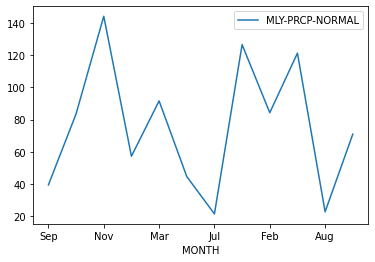

In [39]:
seattle = sw.loc[:, ["MONTH", "MLY-PRCP-NORMAL"]].groupby(sw["MONTH"], as_index= True).agg({'MLY-PRCP-NORMAL':'sum'}).sort_values("MONTH", ascending= False)
seattle.plot(
    kind = 'line'
)

In [18]:
# Plotting MLY-PRCP-NORMAL from seattle_weather against the MONTH

ax.plot(sw["MONTH"], sw["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--')
ax.plot(aw["MONTH"], aw["MLY-PRCP-NORMAL"], marker = 'v', linestyle = '--')

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()